In [1]:
#Prepare a prediction model for profit of 50_startups data.
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

#R&D Spend -- Research and devolop spend in the past few years
#Administration -- spend on administration in the past few years
#Marketing Spend -- spend on Marketing in the past few years
#State -- states from which data is collected
#Profit  -- profit of each state in the past few years

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.rename(columns={'Marketing Spend': 'MSpend','R&D Spend':'RD','Administration' : 'Adm'}, inplace=True)

In [5]:
df.head()

,RD,Adm,MSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.isna().sum()

RD        0
Adm       0
MSpend    0
State     0
Profit    0
dtype: int64

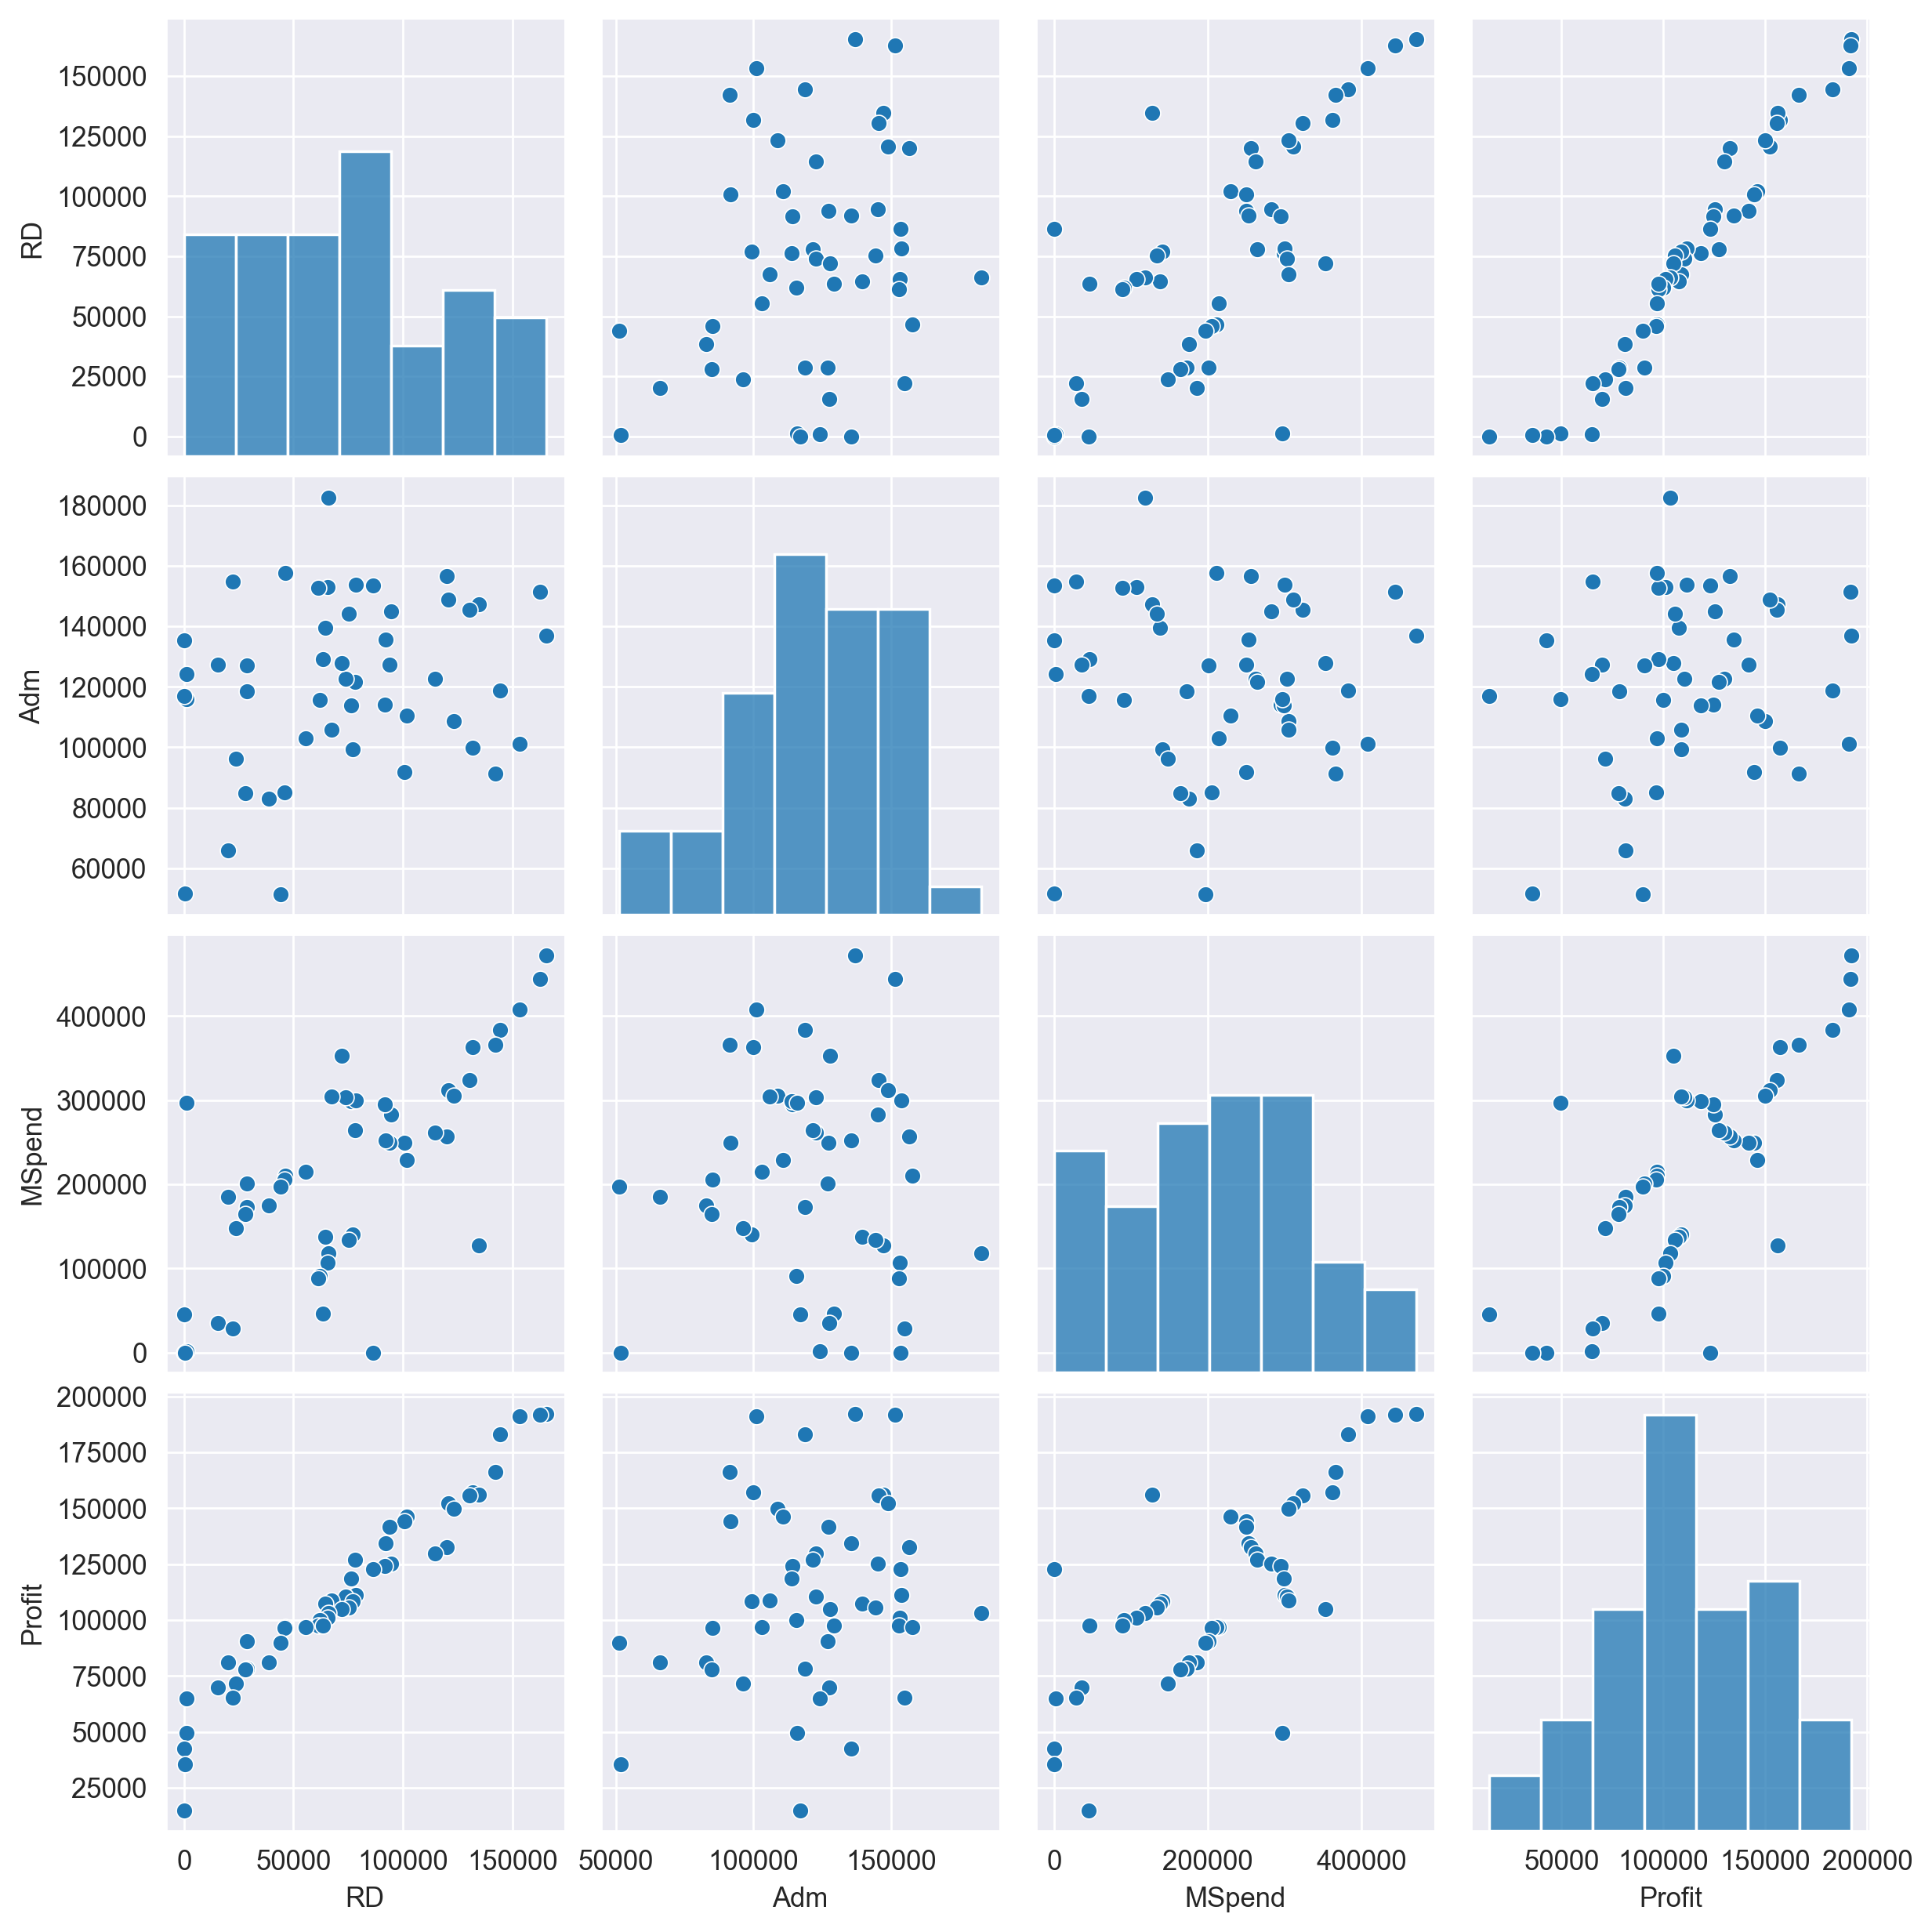

In [7]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')


sns.pairplot(df)

<AxesSubplot:>

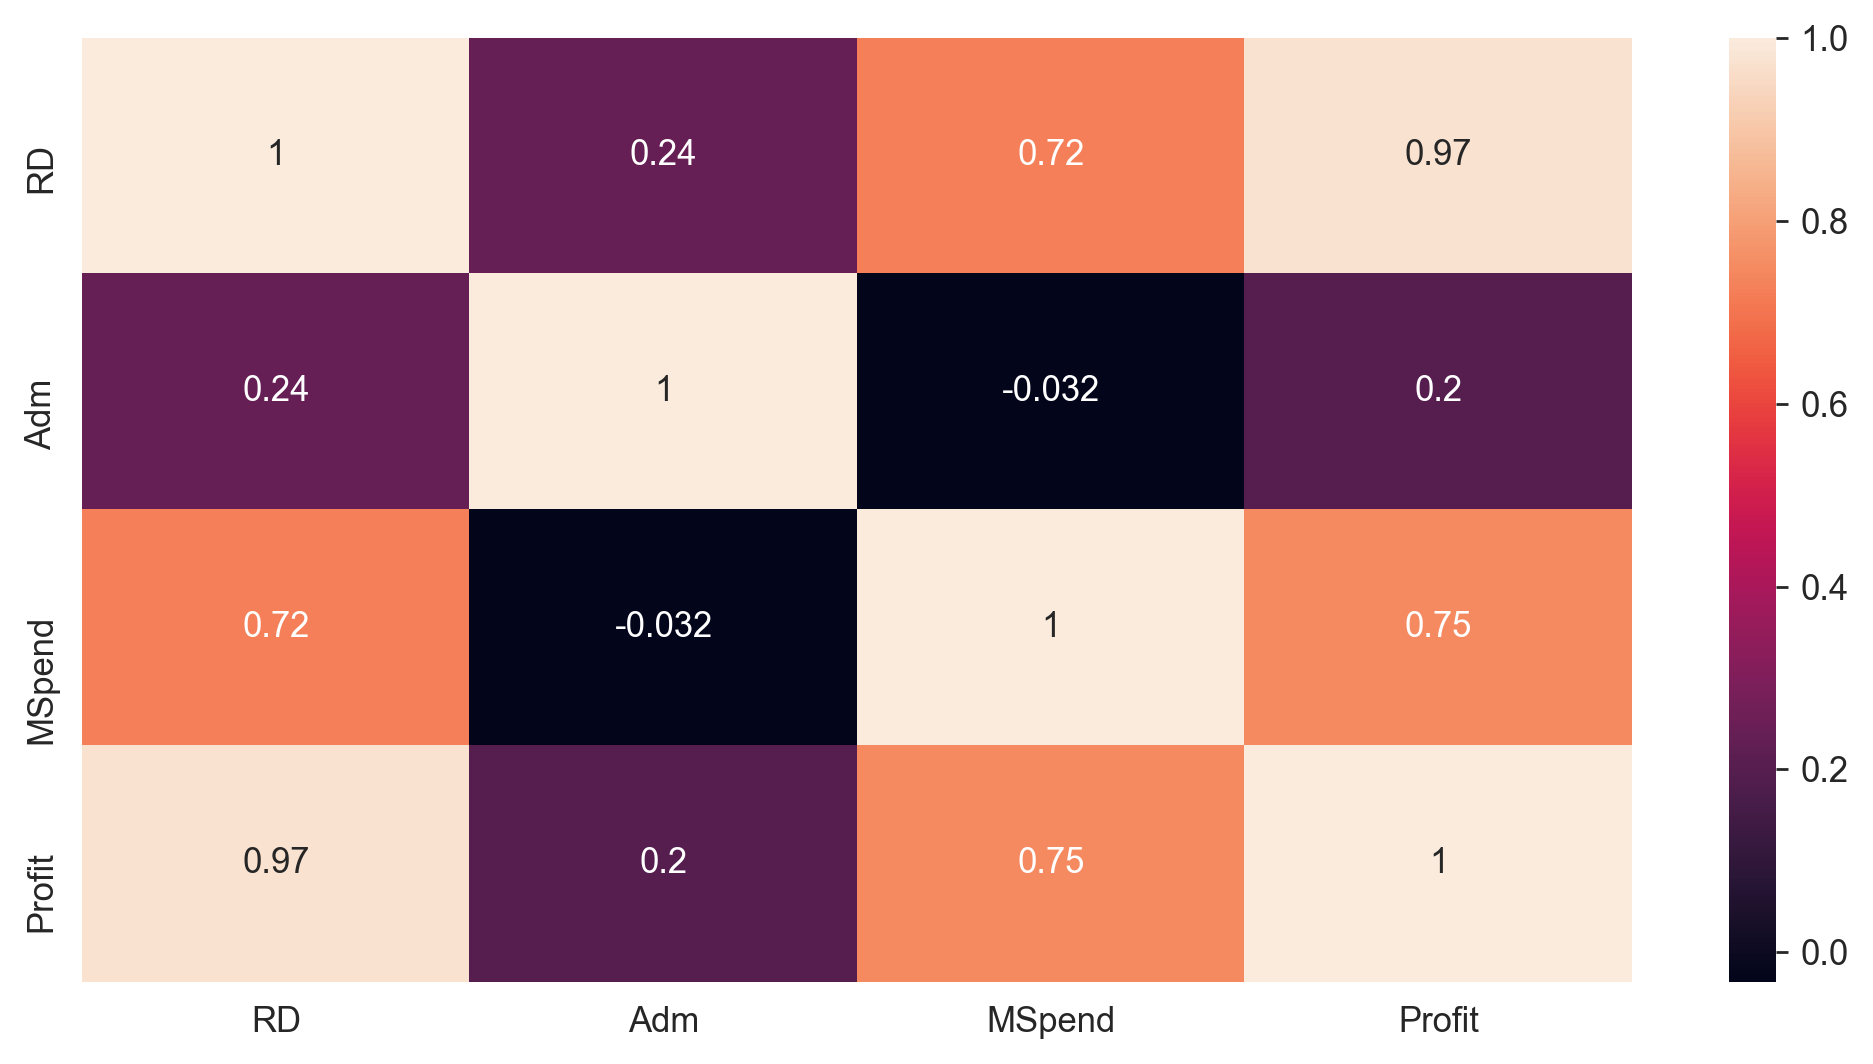

In [8]:
#correlation
sns.heatmap(df.corr(),annot=True)

# Model buildigs

In [9]:
import statsmodels.formula.api as smf

In [10]:
df

,RD,Adm,MSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
model = smf.ols('Profit~RD+Adm+MSpend', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        02:45:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MSpend         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
Rd = smf.ols('Profit~RD', data= df).fit()

In [13]:
Rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.50e-32
Time:                        02:45:35   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
Mspend =smf.ols('Profit~MSpend',data=df).fit()

In [15]:
Mspend.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           4.38e-10
Time:                        02:45:35   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MSpend         0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
adm = smf.ols('Profit~Adm', data=df).fit()

In [17]:
adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 10 Mar 2023   Prob (F-statistic):              0.162
Time:                        02:45:35   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Adm            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#calculate VIF

In [19]:
df.columns

Index(['RD', 'Adm', 'MSpend', 'State', 'Profit'], dtype='object')

In [20]:
r_RD =smf.ols('RD~Adm+MSpend', data=df).fit().rsquared
r_RD

0.5949618224573936

In [21]:
vif_RD = 1/(1-r_RD)

vif_RD

2.4689030699947017

In [22]:
r_MSpend =smf.ols('MSpend~Adm+RD', data=df).fit().rsquared
r_MSpend

0.5702202685282503

In [23]:
vif_MSpend = 1/(1-r_MSpend)

vif_MSpend

2.3267732905308773

In [24]:
r_Adm = smf.ols('Adm~MSpend+RD', data= df).fit().rsquared
r_Adm

0.14900208239517532

In [25]:
vif_Adm = 1/(1-r_Adm)

vif_Adm

1.1750910070550453

In [26]:
vif = pd.DataFrame({
    'Feature': ['RD','MSpend','ADM'],
    'VIF':[vif_RD,vif_MSpend,vif_Adm]
})

In [27]:
vif

,Feature,VIF
0,RD,2.468903
1,MSpend,2.326773
2,ADM,1.175091


In [28]:
#Subset Selection

#AIC
RD = smf.ols('Profit~RD+MSpend+Adm', data=df).fit()

print(RD.rsquared , RD.aic)


0.9507459940683246 1058.7714985998055


In [29]:
#Model Validation Techniques
#Residual Analysis

#Normality Test 

RD.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [30]:
import statsmodels.api as sm

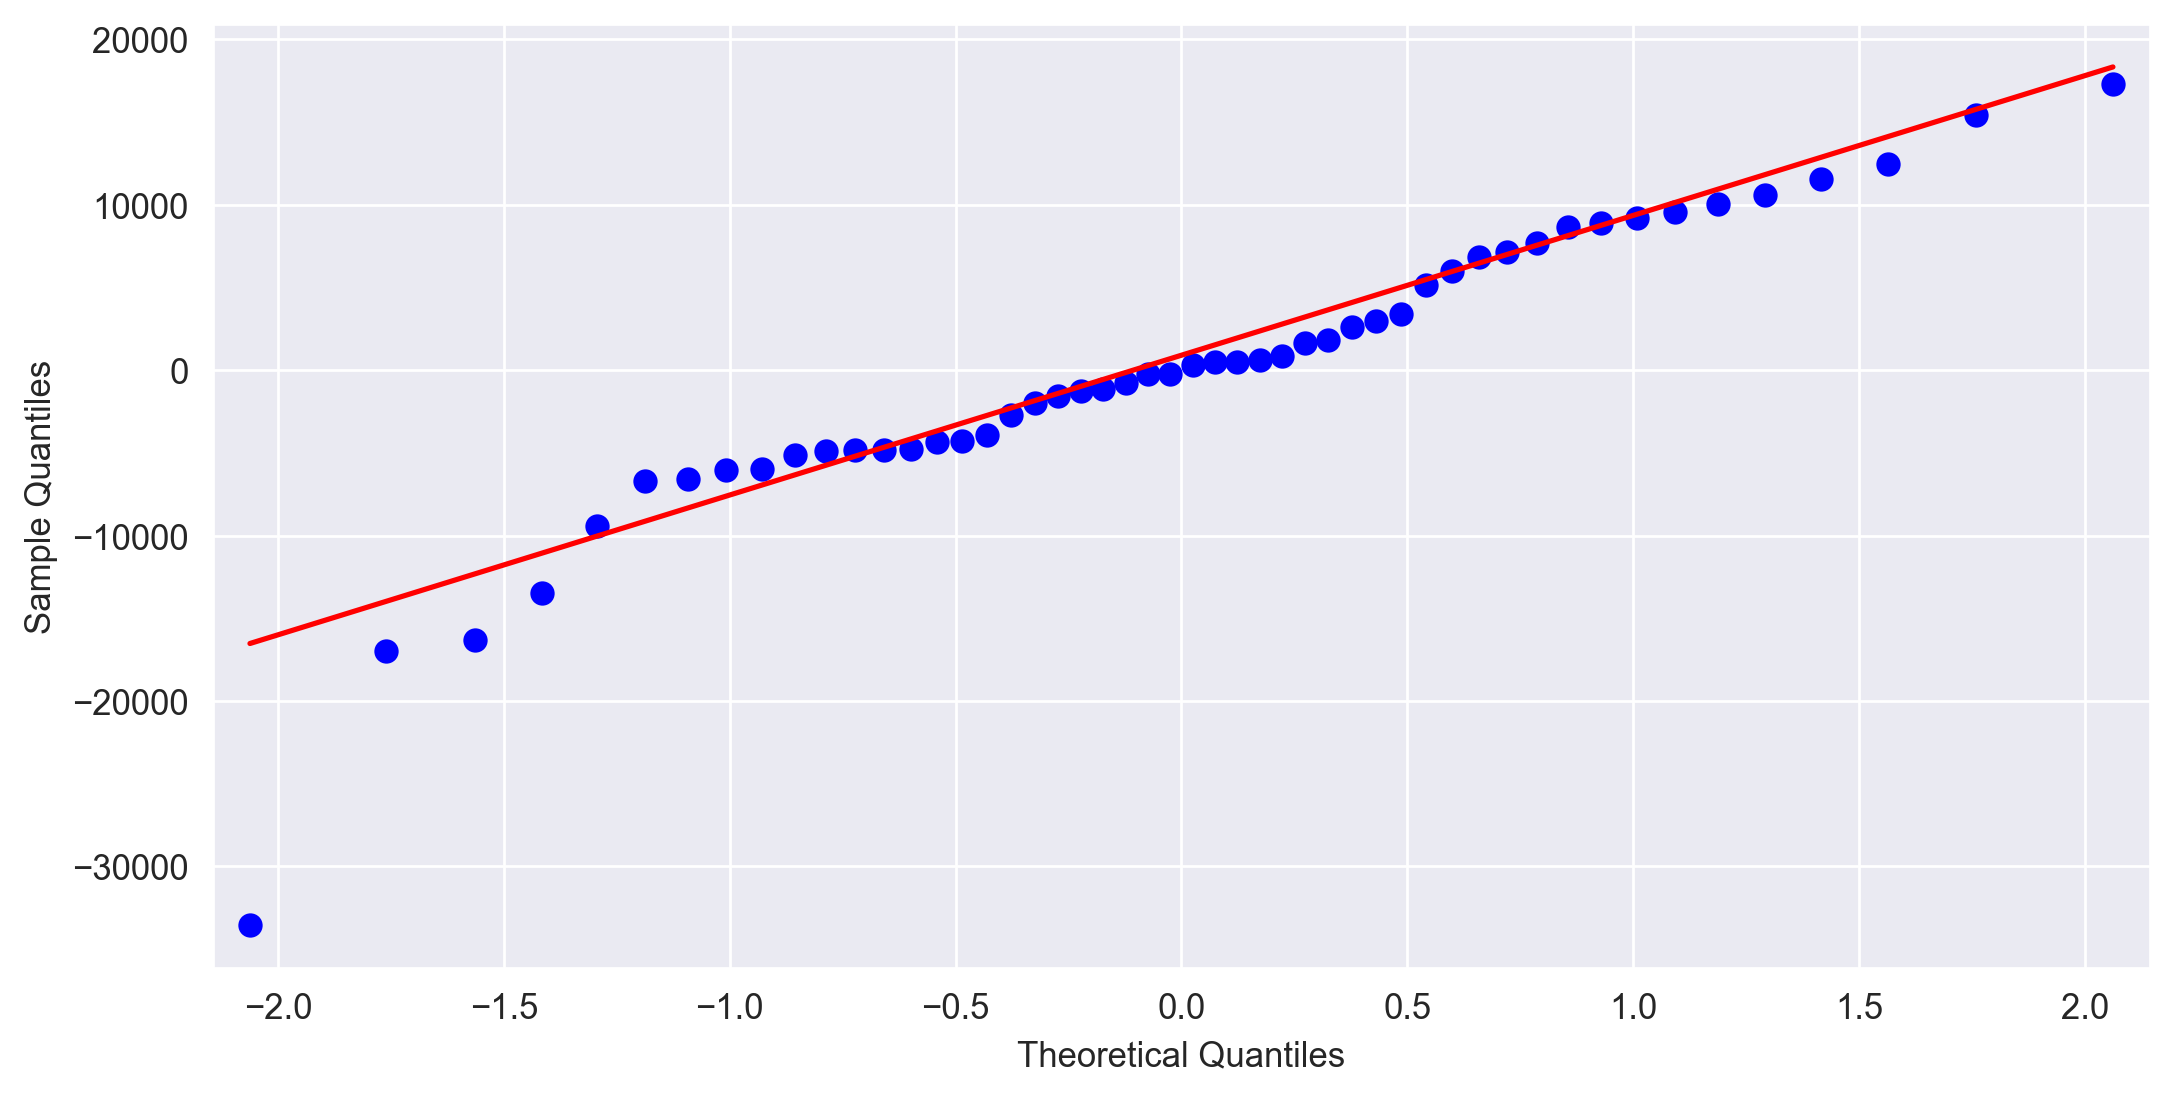

In [31]:
#Q_Q Plot
sm.qqplot(RD.resid, line='q');

In [32]:
np.where(RD.resid<(-3000))

(array([ 4,  5,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 46, 47, 48, 49],
       dtype=int64),)

In [33]:
#residual plotfor homoscedacity 

Text(0, 0.5, 'Residuals')

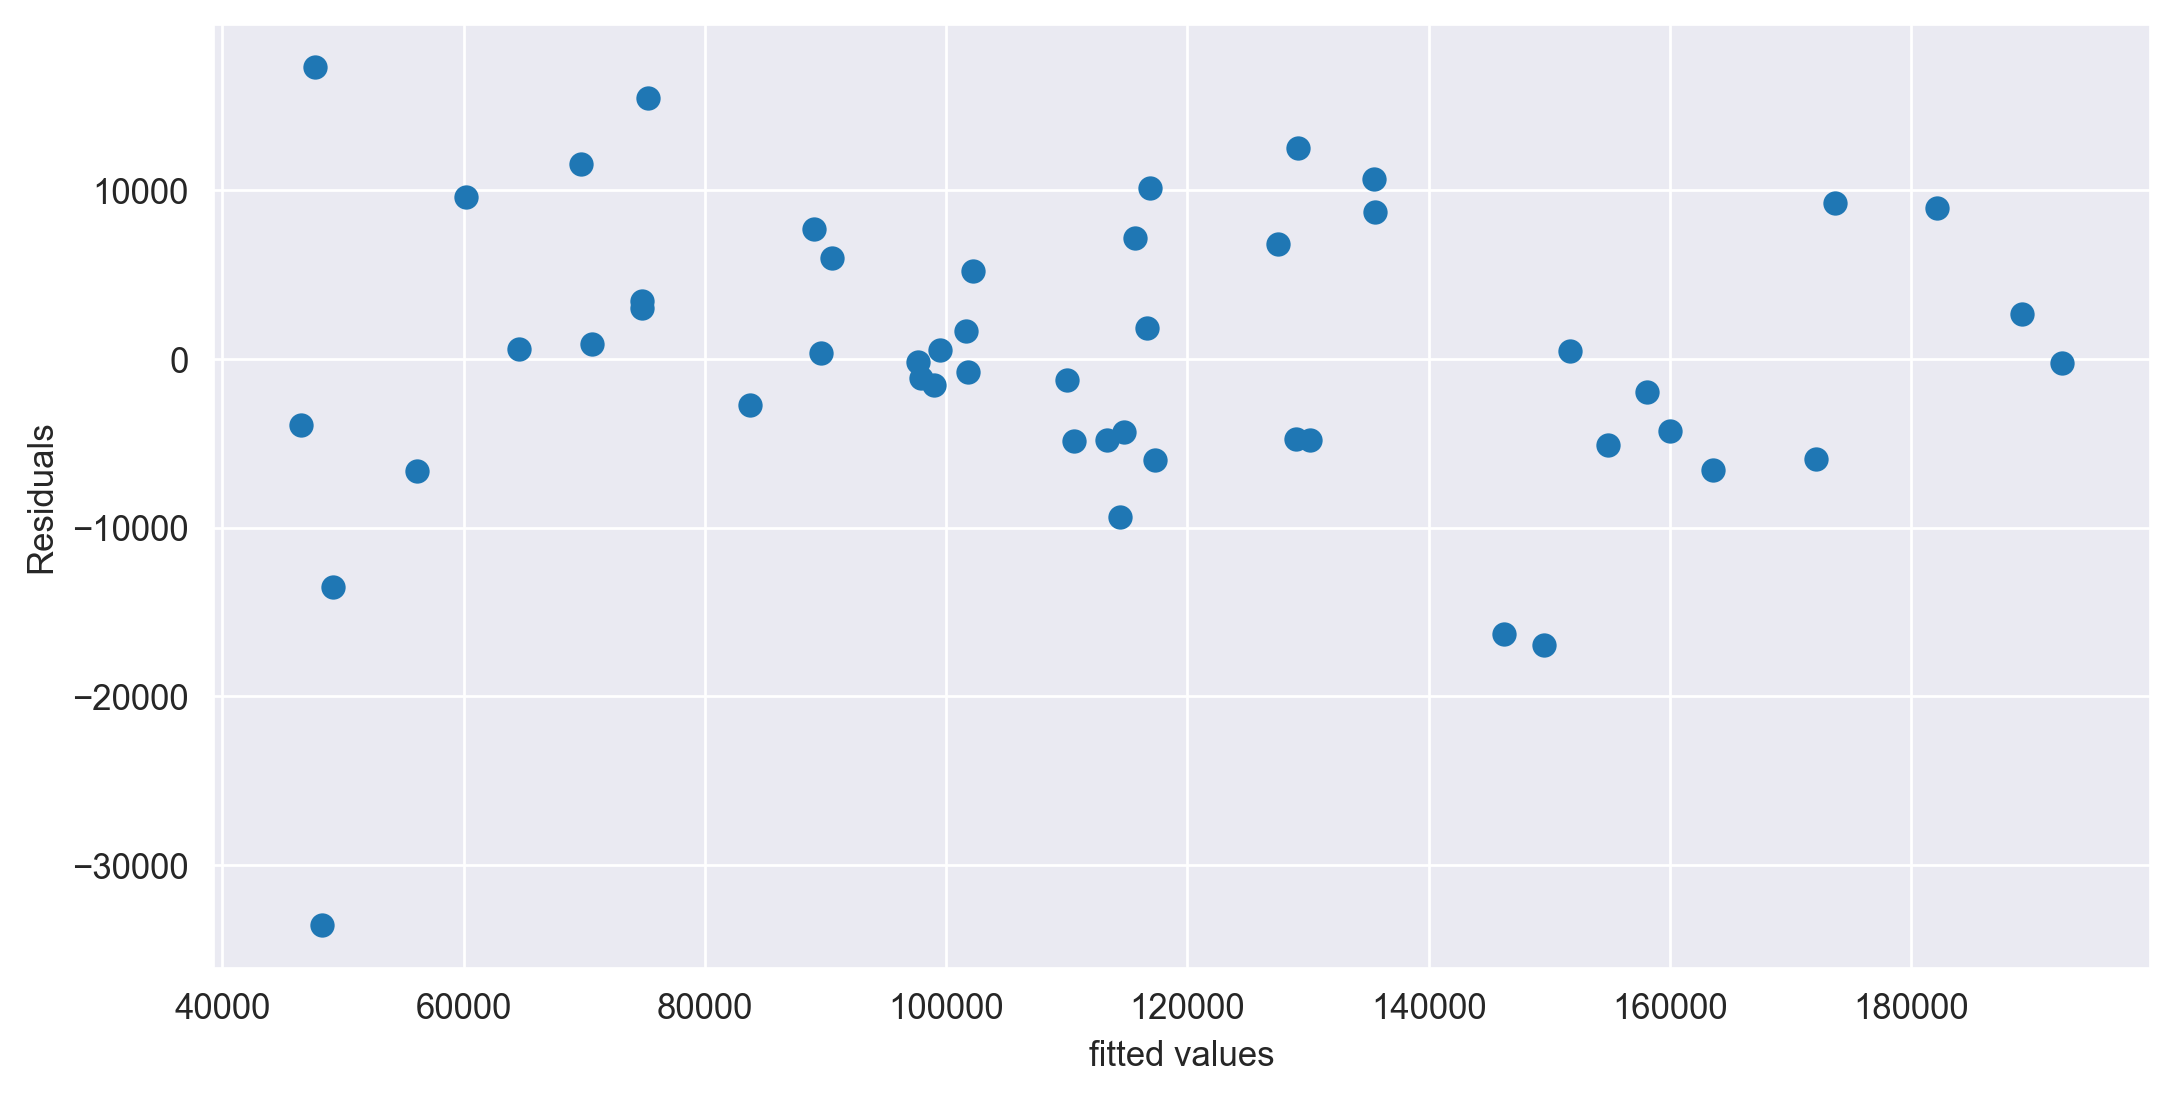

In [34]:
plt.scatter(RD.fittedvalues,RD.resid)
plt.xlabel('fitted values')
plt.ylabel('Residuals')

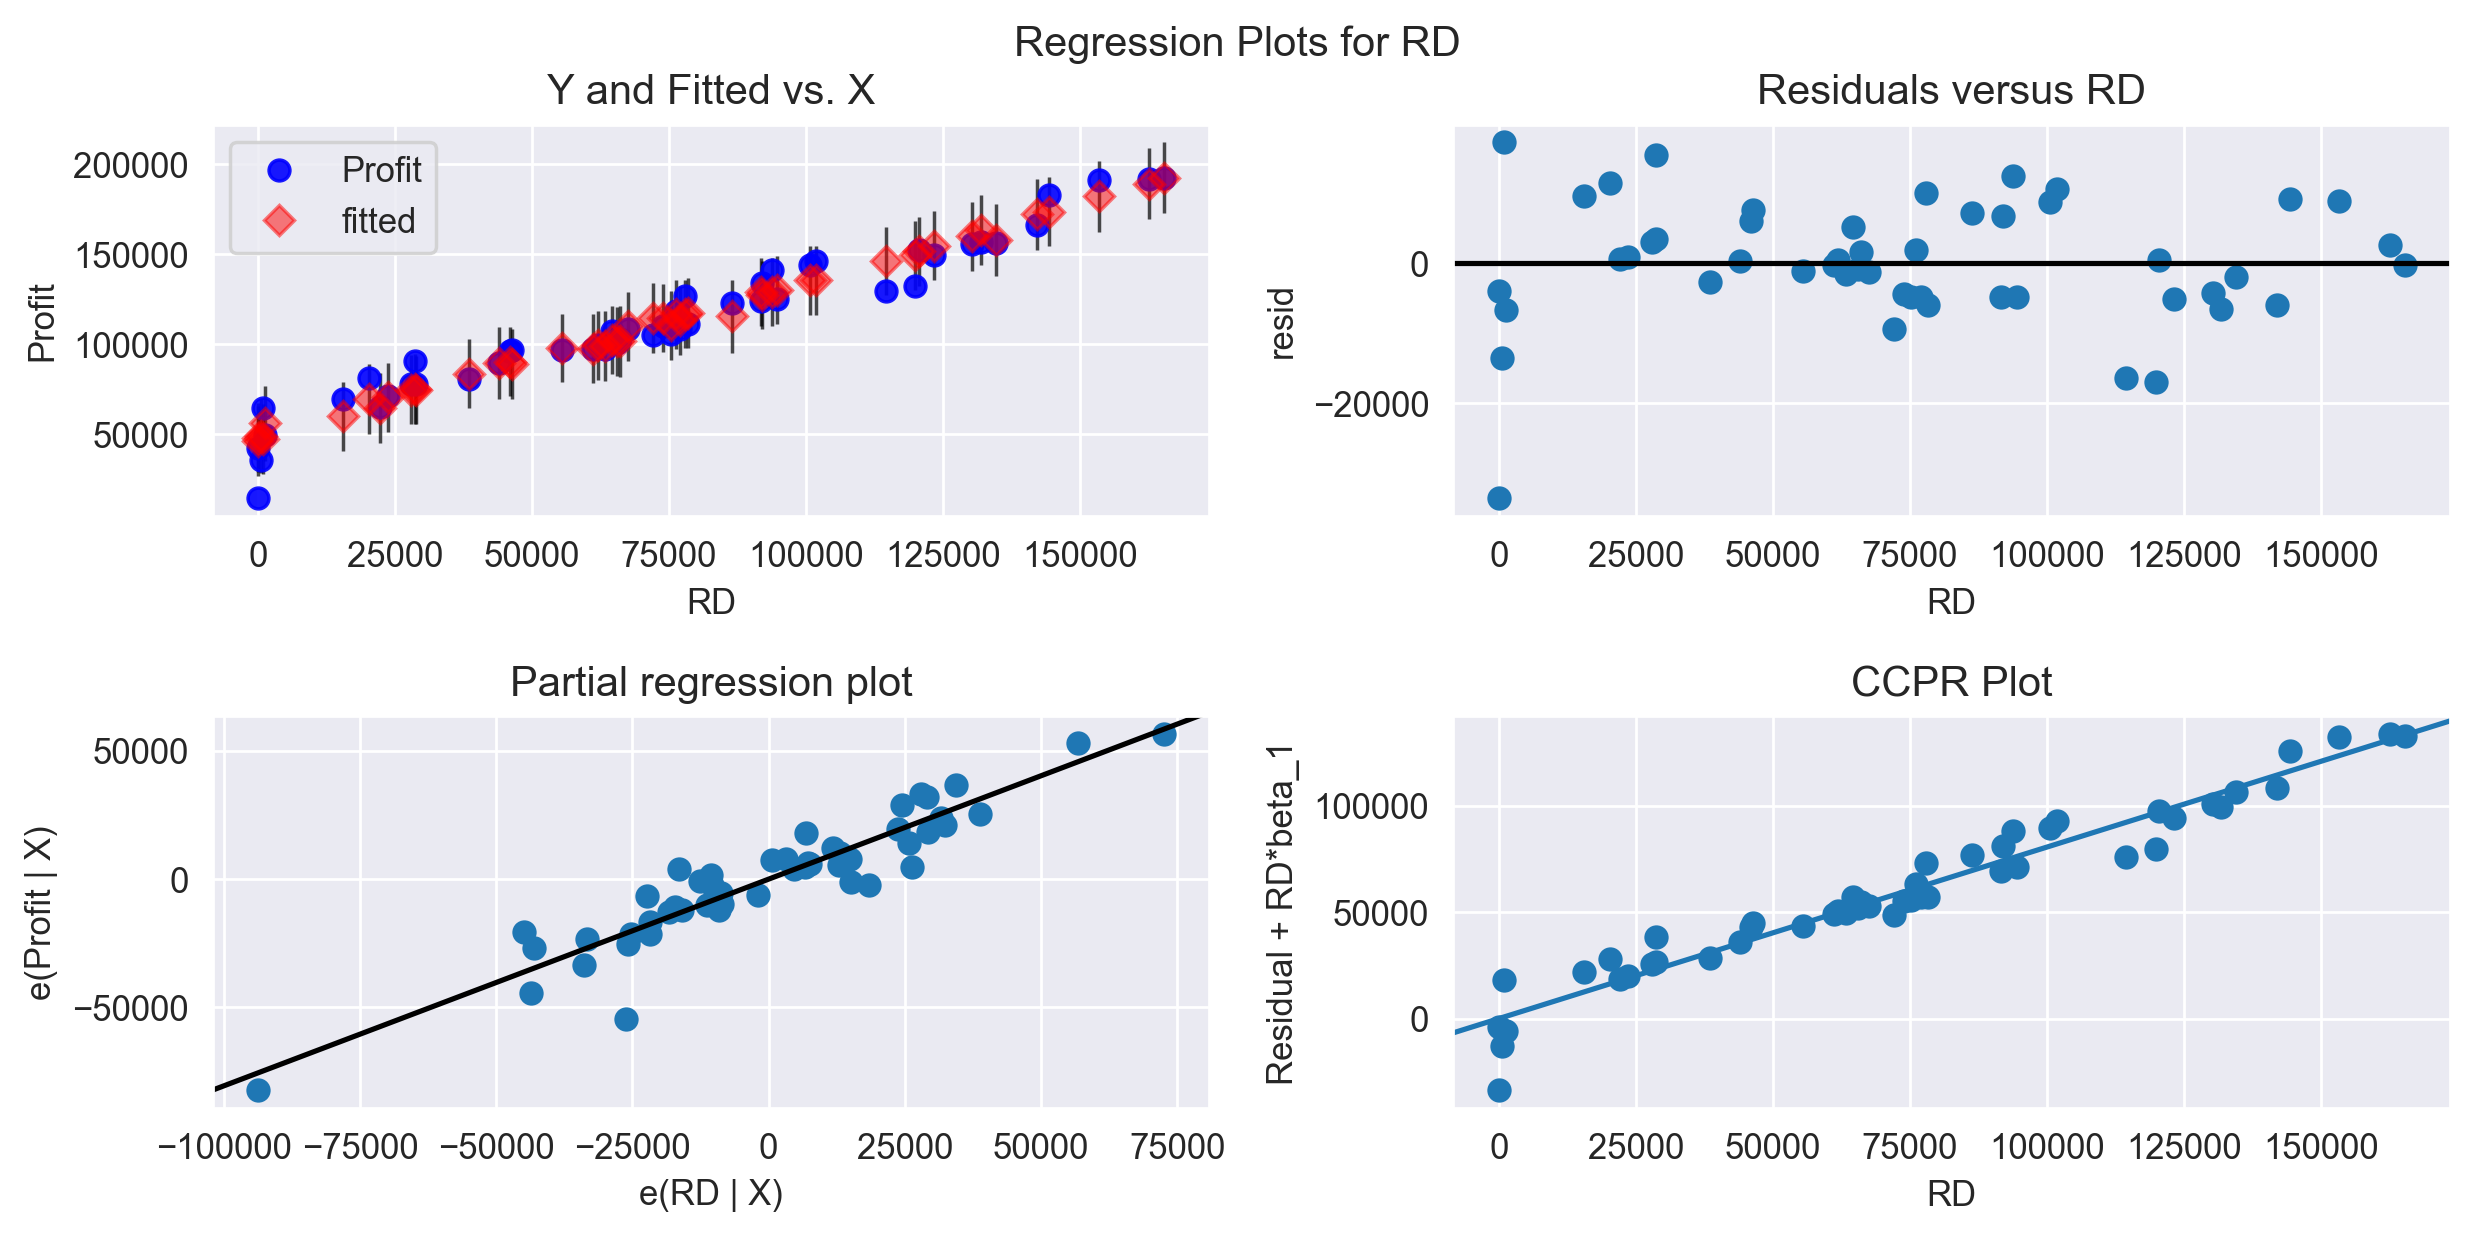

In [35]:
sm.graphics.plot_regress_exog(RD,'RD');

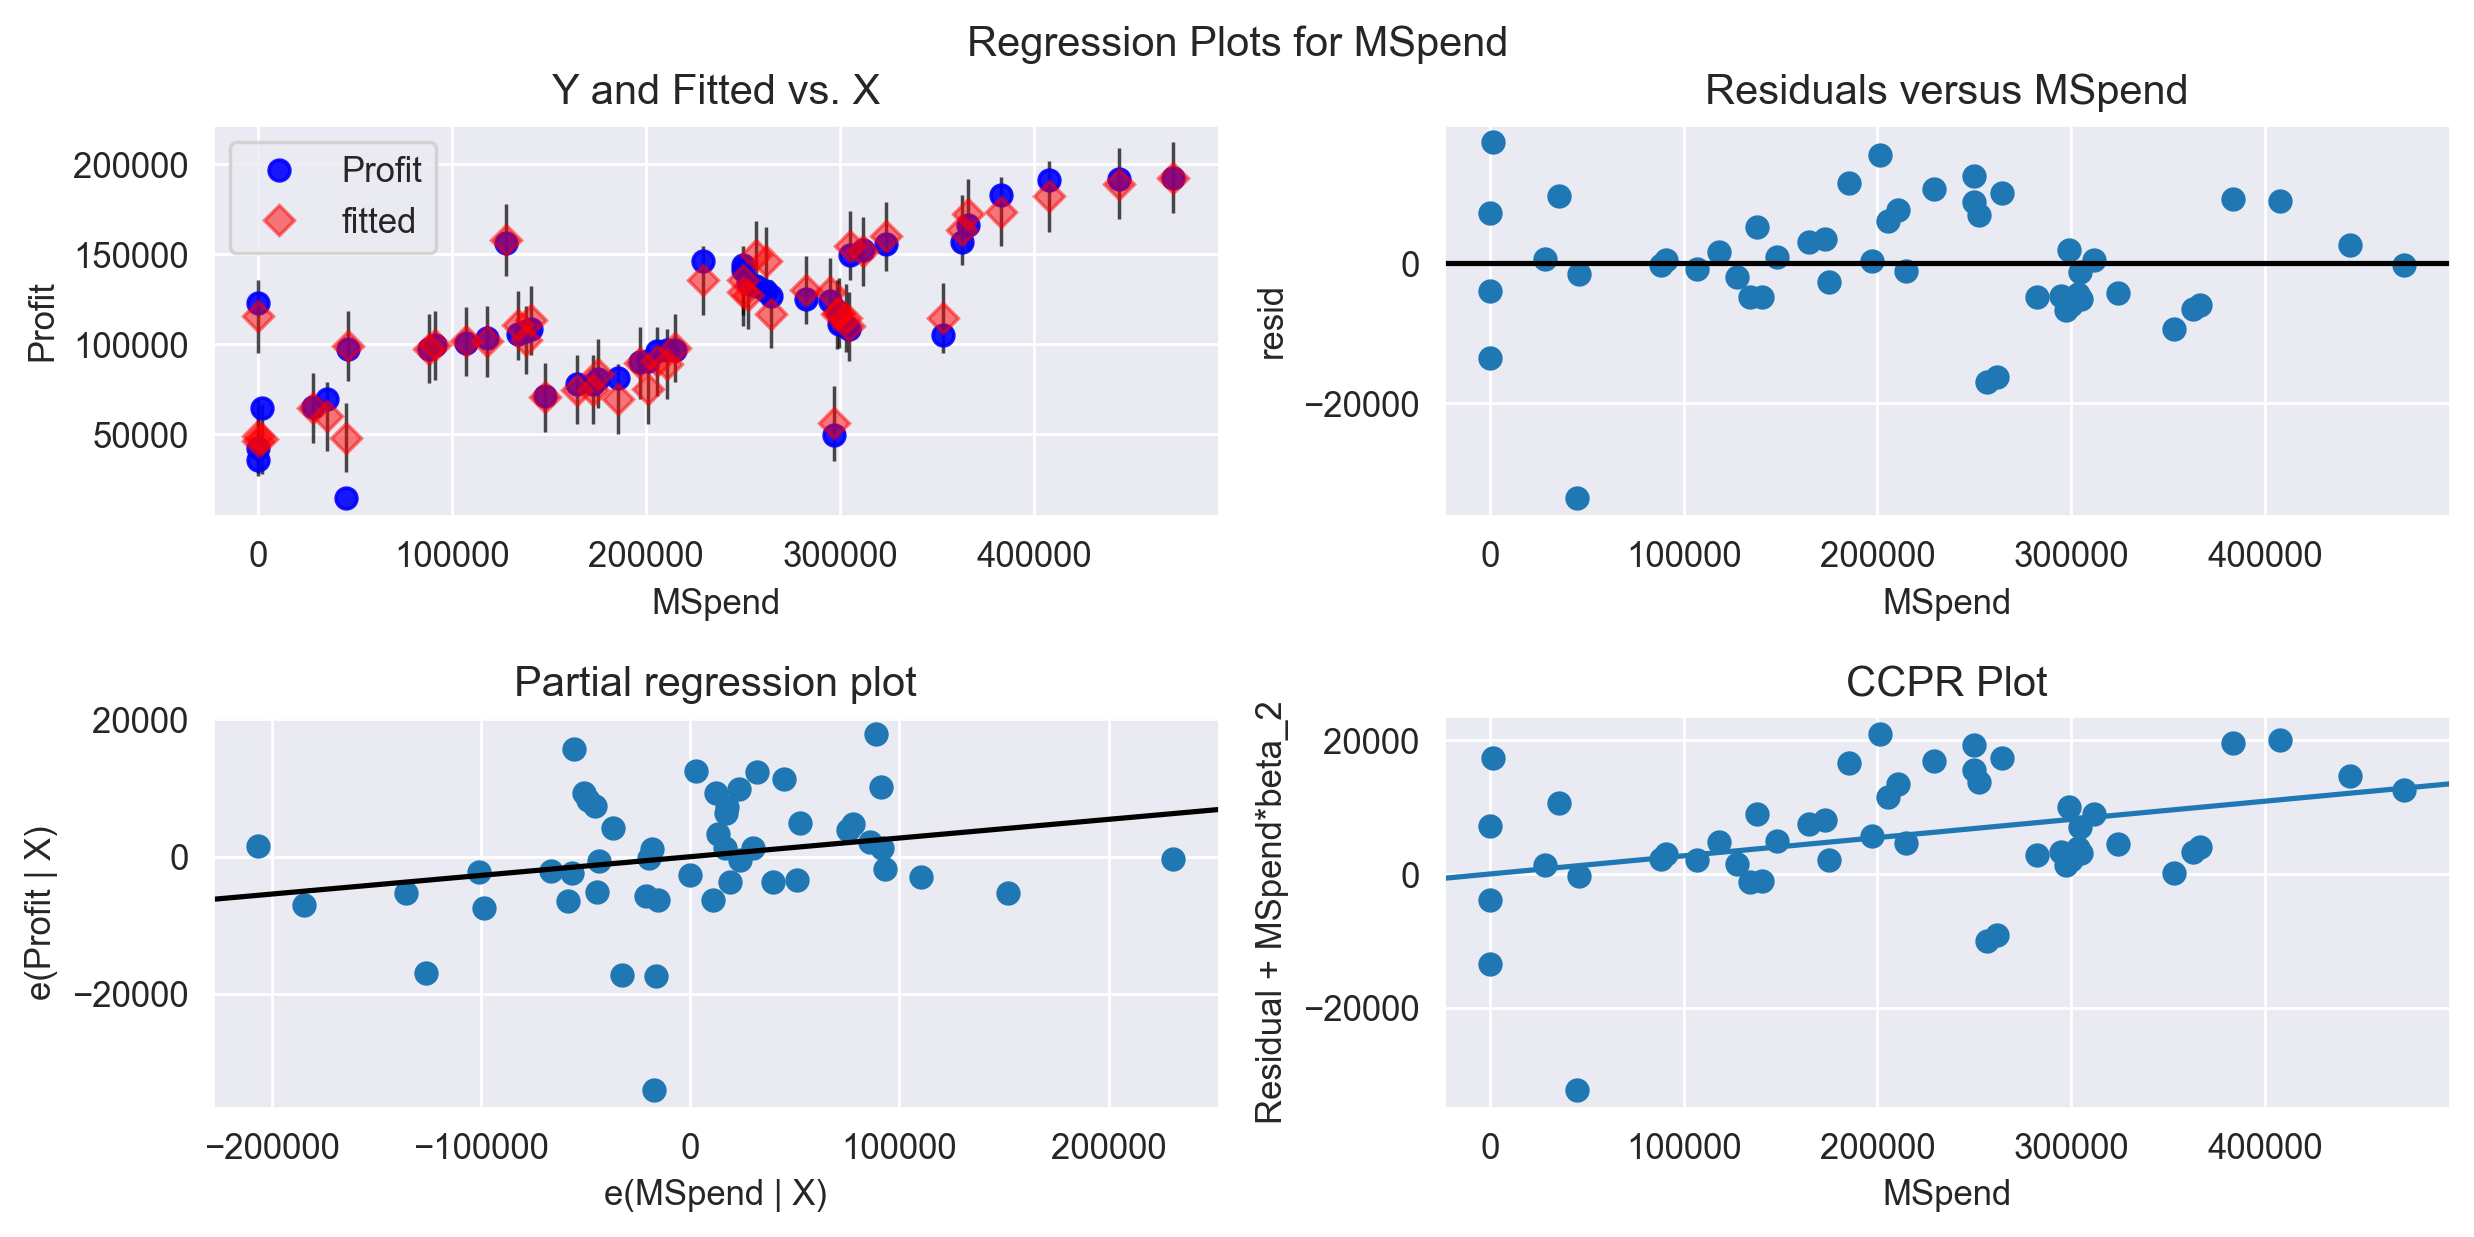

In [36]:
sm.graphics.plot_regress_exog(RD,'MSpend');

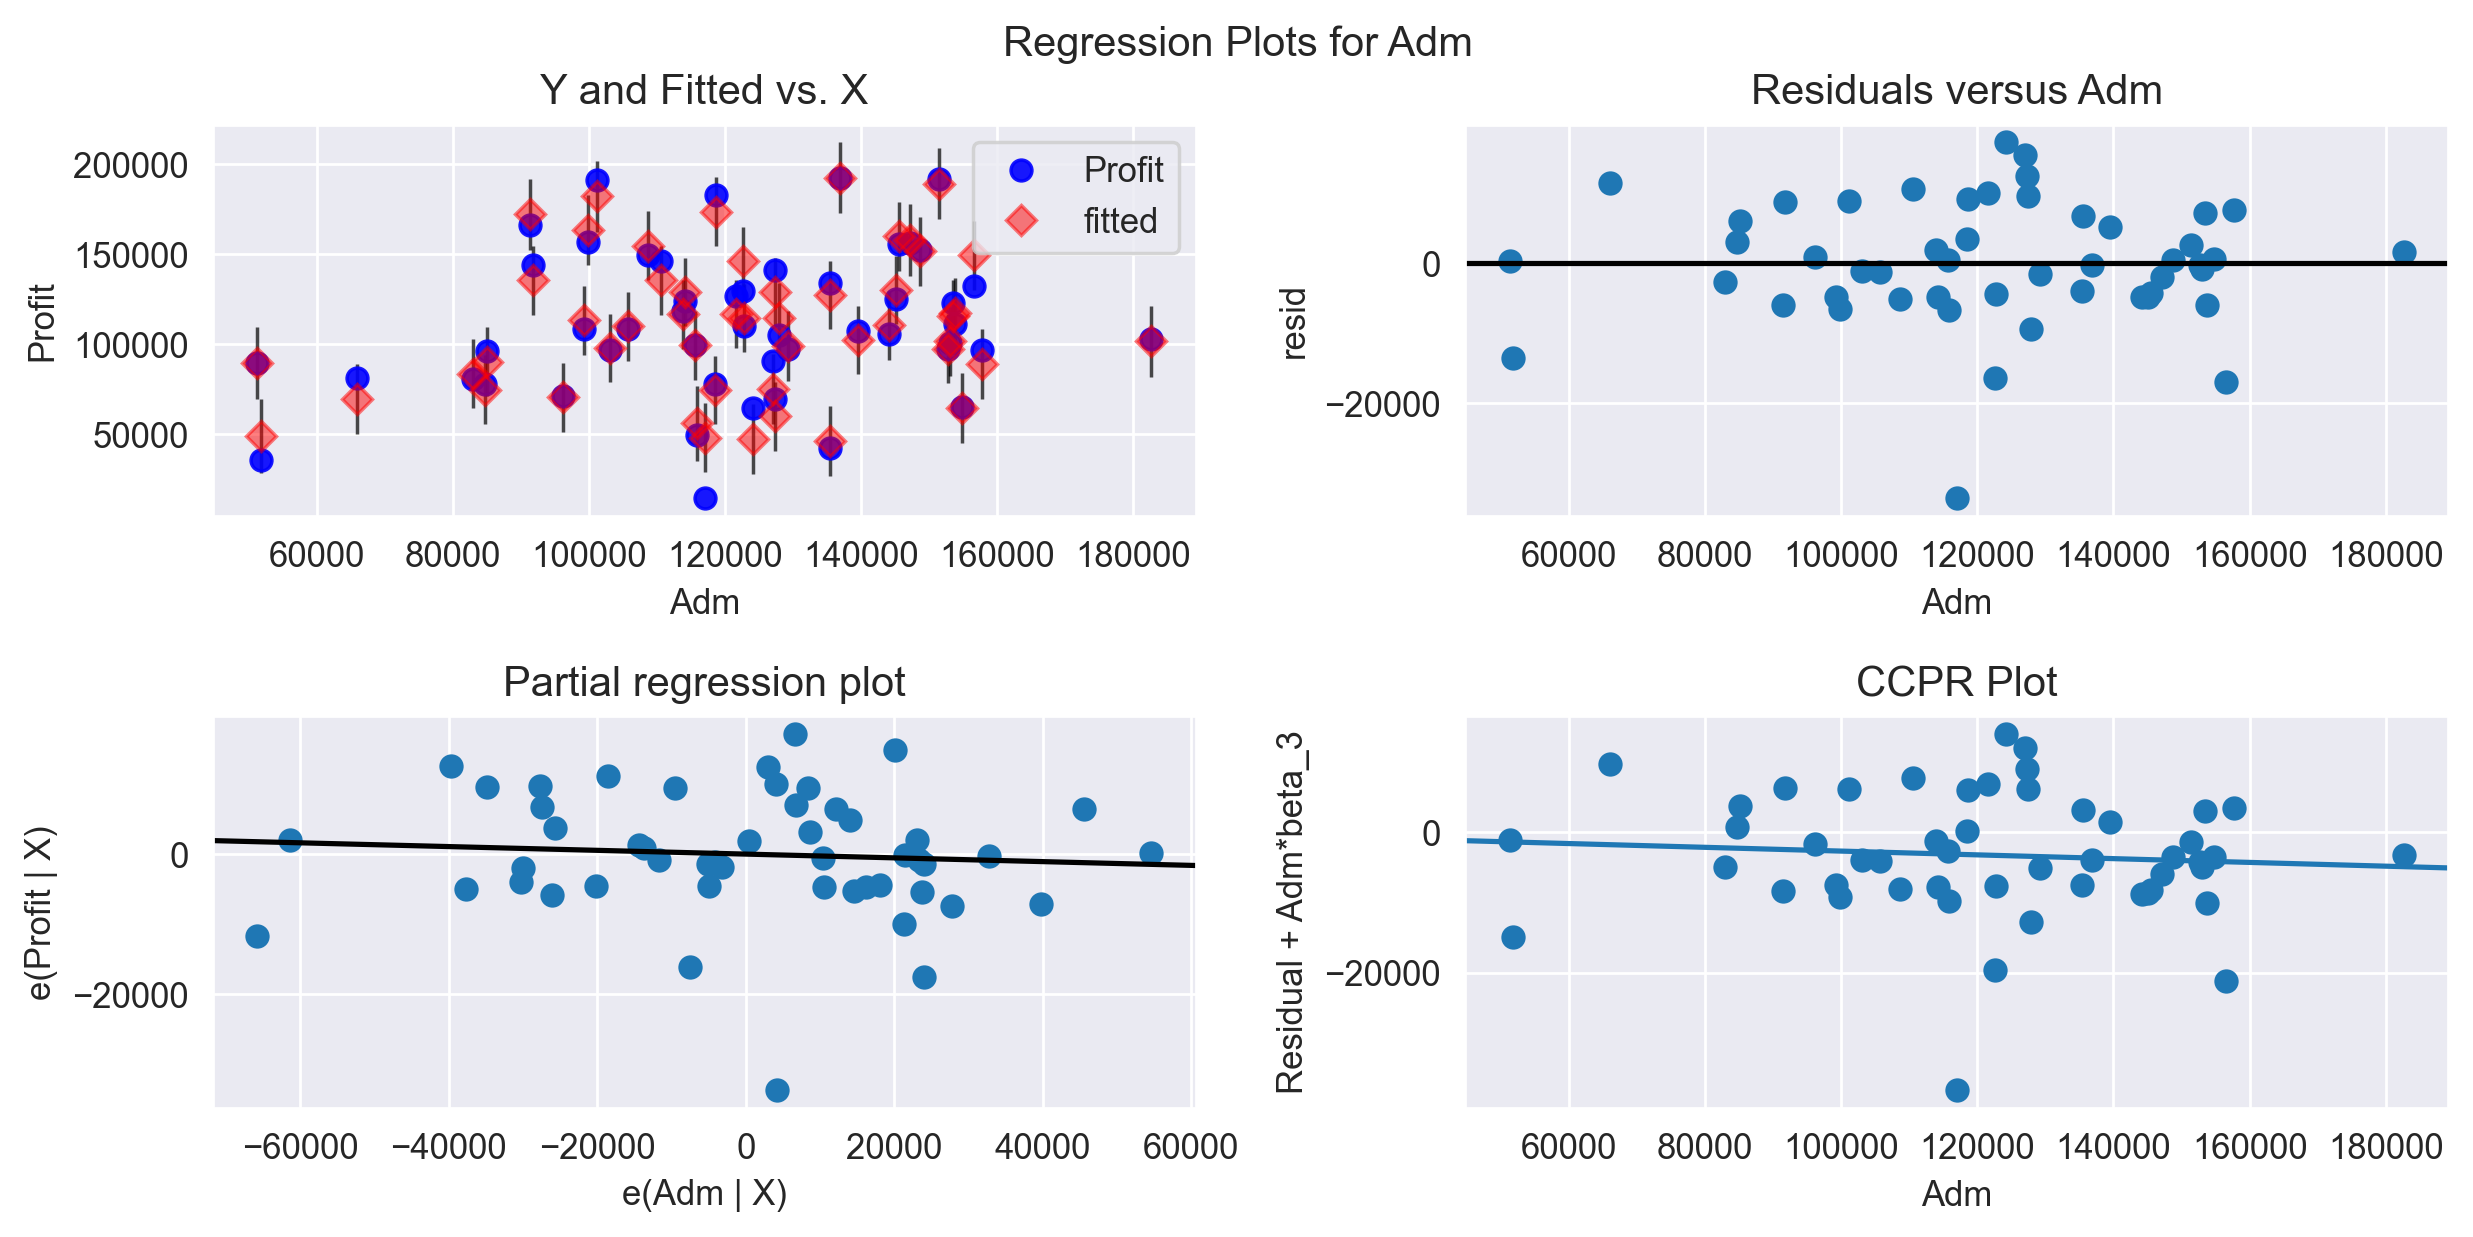

In [37]:
sm.graphics.plot_regress_exog(RD,'Adm');

In [38]:
inf = RD.get_influence()

c,p=inf.cooks_distance

In [39]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<StemContainer object of 3 artists>

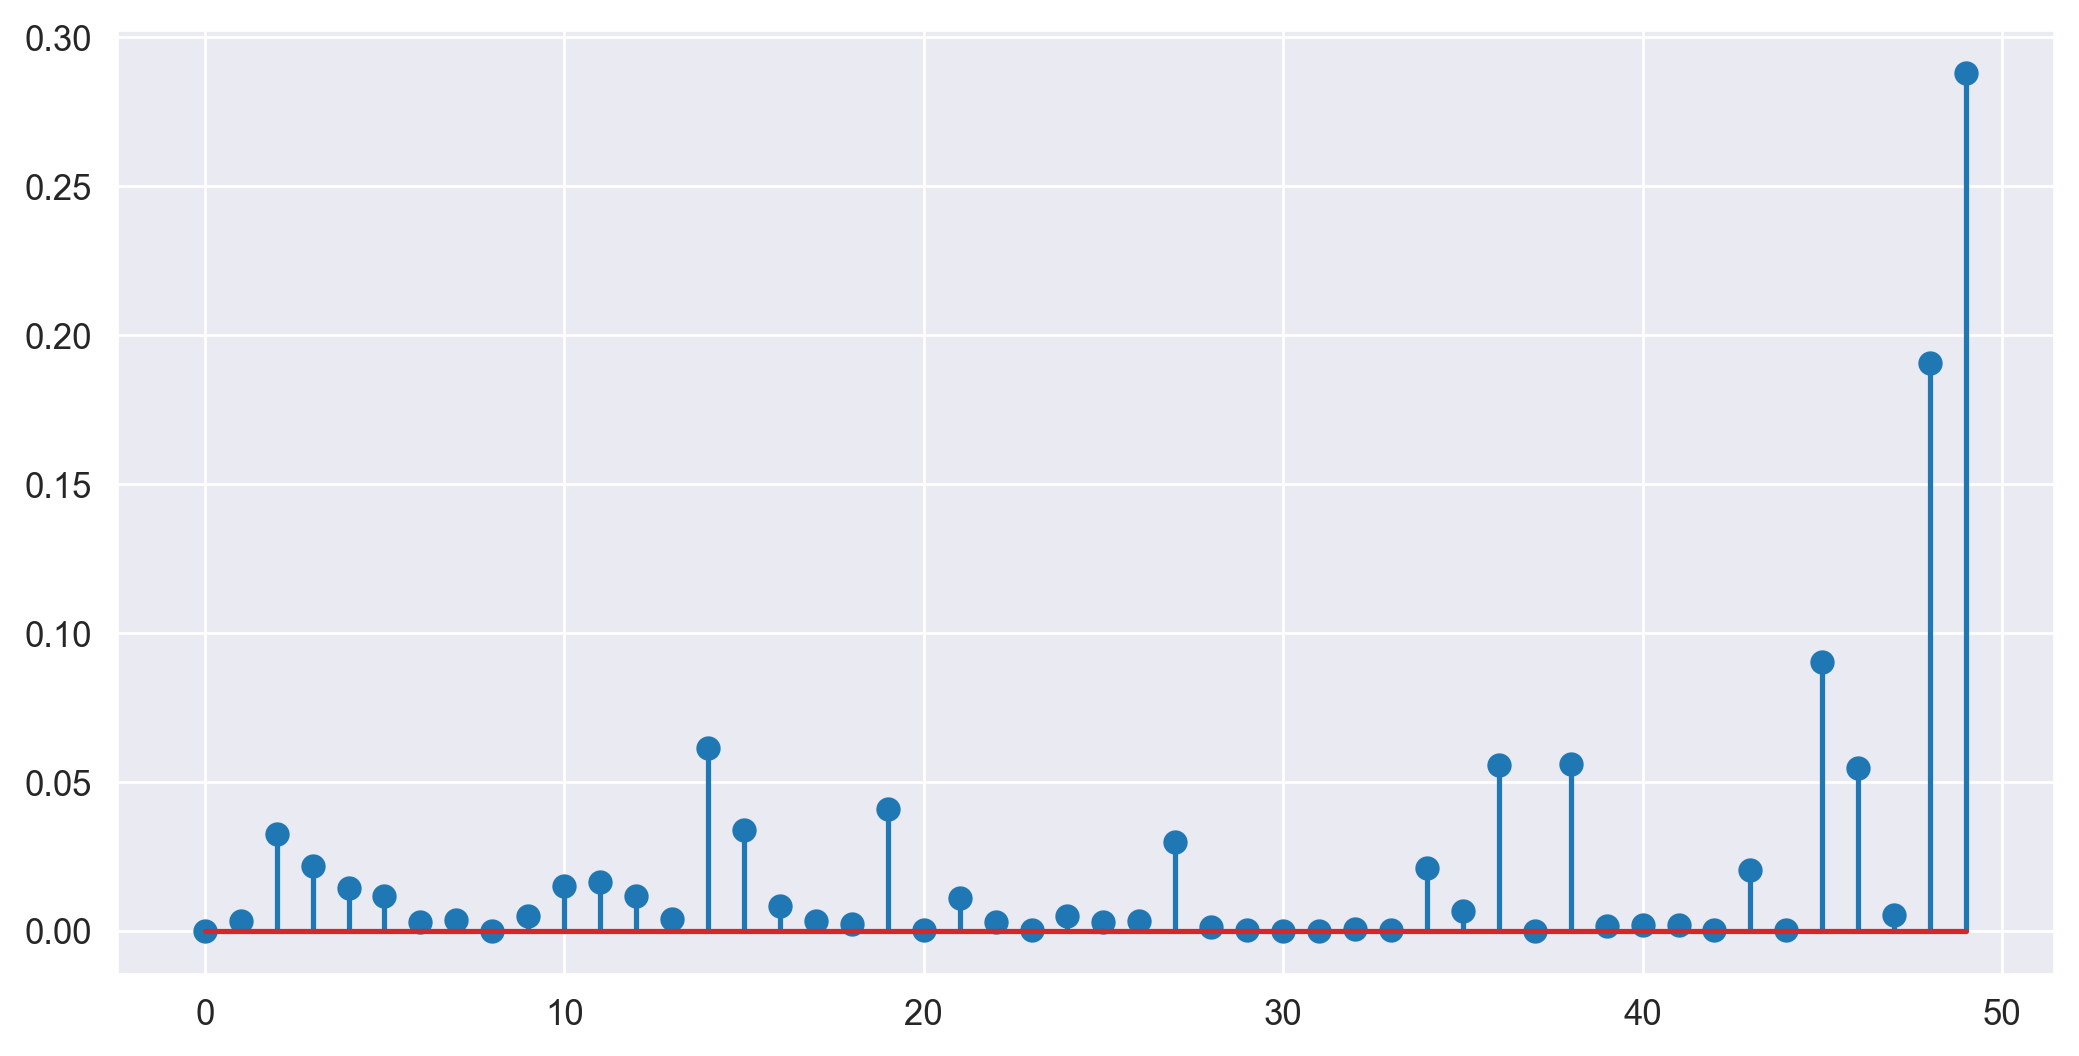

In [40]:
#cooks Distance Plot
plt.stem(range(len(df)),c)

In [41]:
np.argmax(c), np.max(c)

(49, 0.2880822927543268)

In [42]:
df.iloc[[49]]

,RD,Adm,MSpend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [43]:
df.head(5)

,RD,Adm,MSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
#levarage Calculate cutoff

In [45]:
k1 = len(df.columns)
k1
k = k1-1
k

4

In [46]:
n = len(df)
n

50

In [47]:
cutoff = 3*(k+1)/n
cutoff

0.3

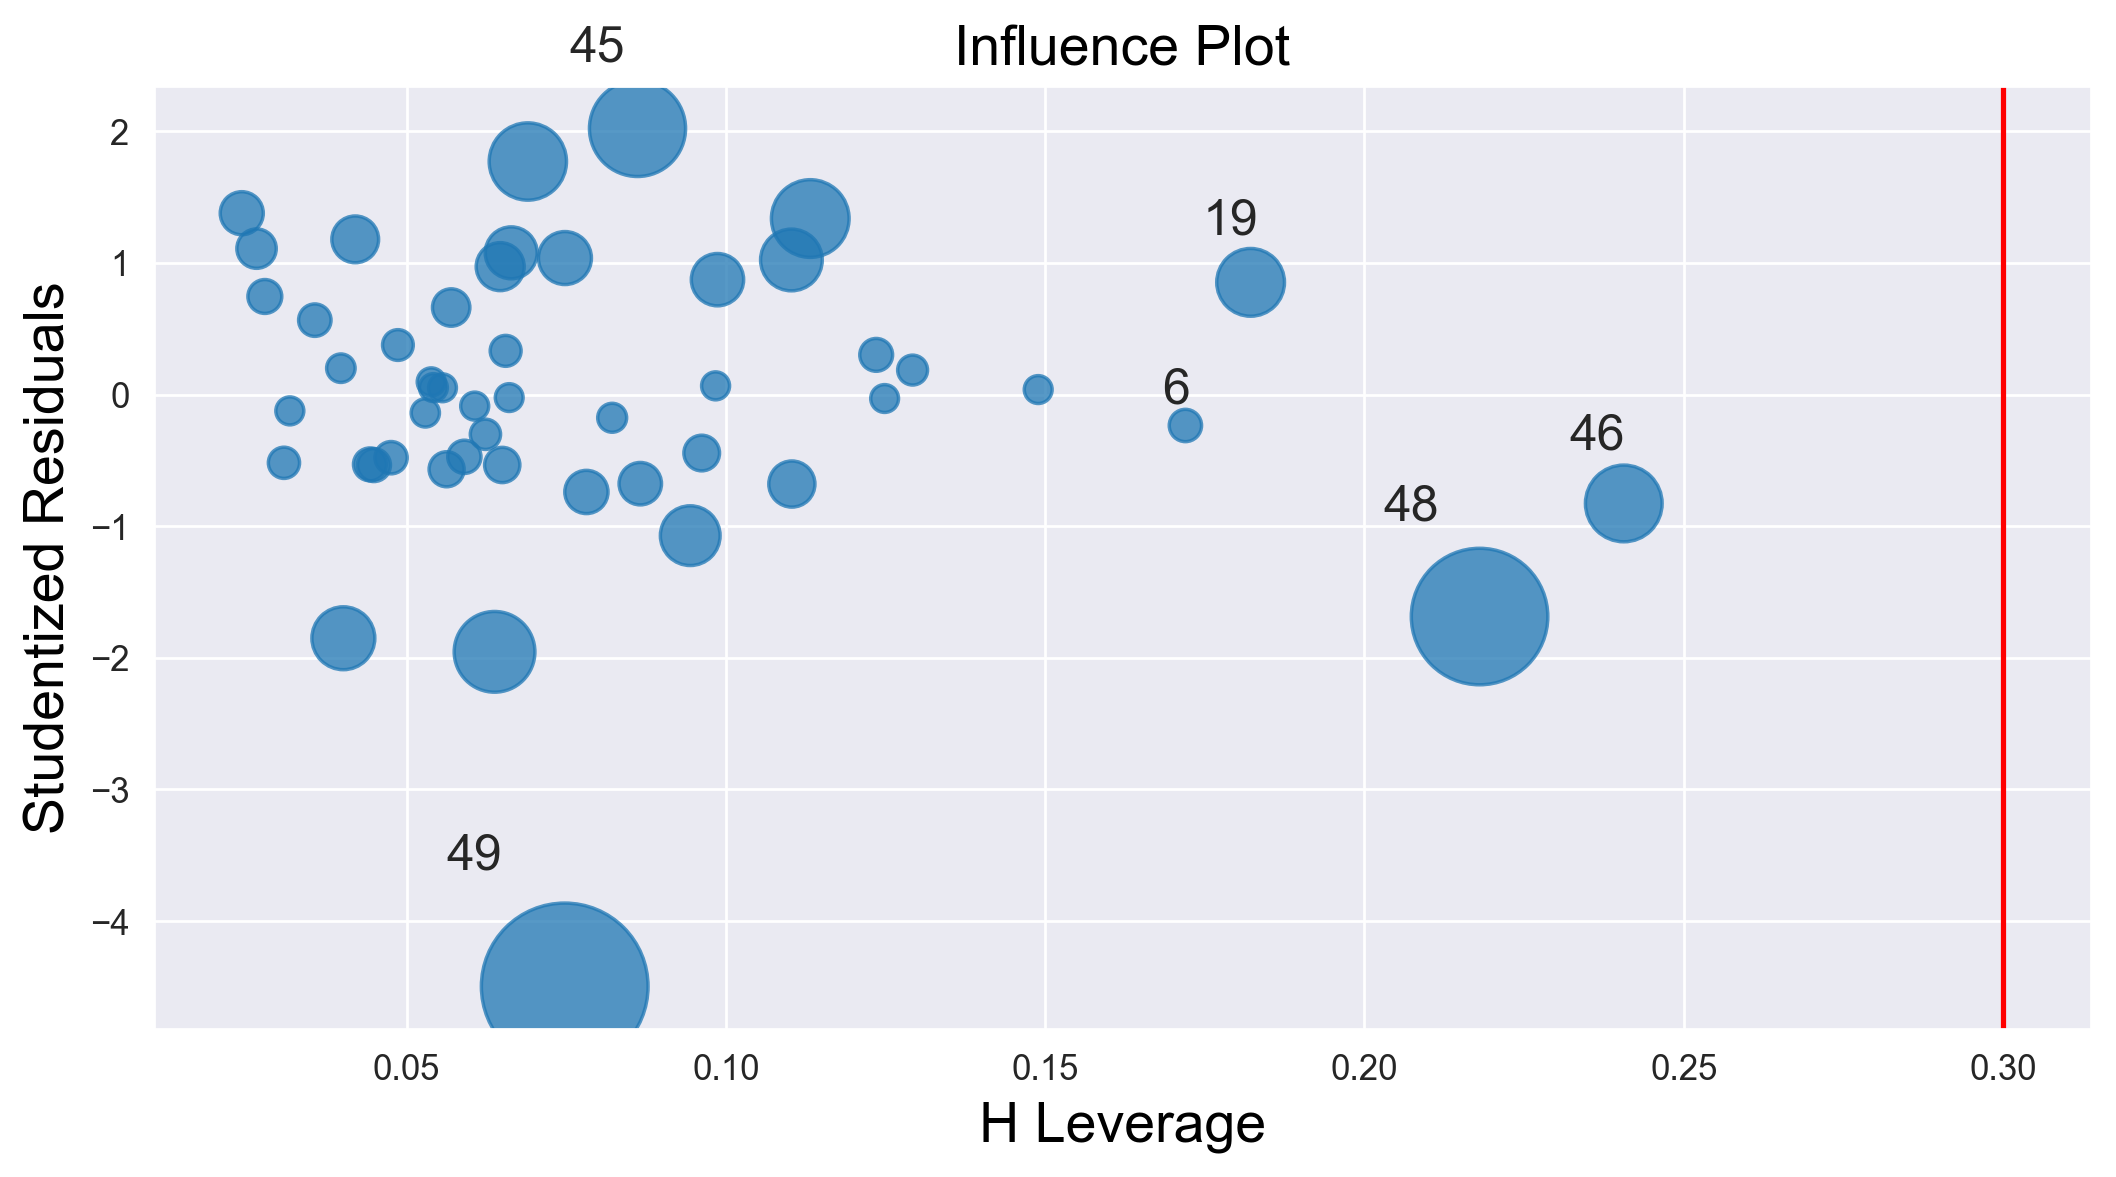

In [48]:
#influencer plot
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(RD);
plt.axvline(cutoff,color='red')

In [49]:
df.drop(index=[49],inplace=True)

In [50]:
df

,RD,Adm,MSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [51]:
df.reset_index(inplace=True)

df

,index,RD,Adm,MSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [62]:
df.drop(columns=['index'],inplace =True)

df

,RD,Adm,MSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [57]:
model = smf.ols('Profit~MSpend+Adm+RD', data=df).fit()

inf = model.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

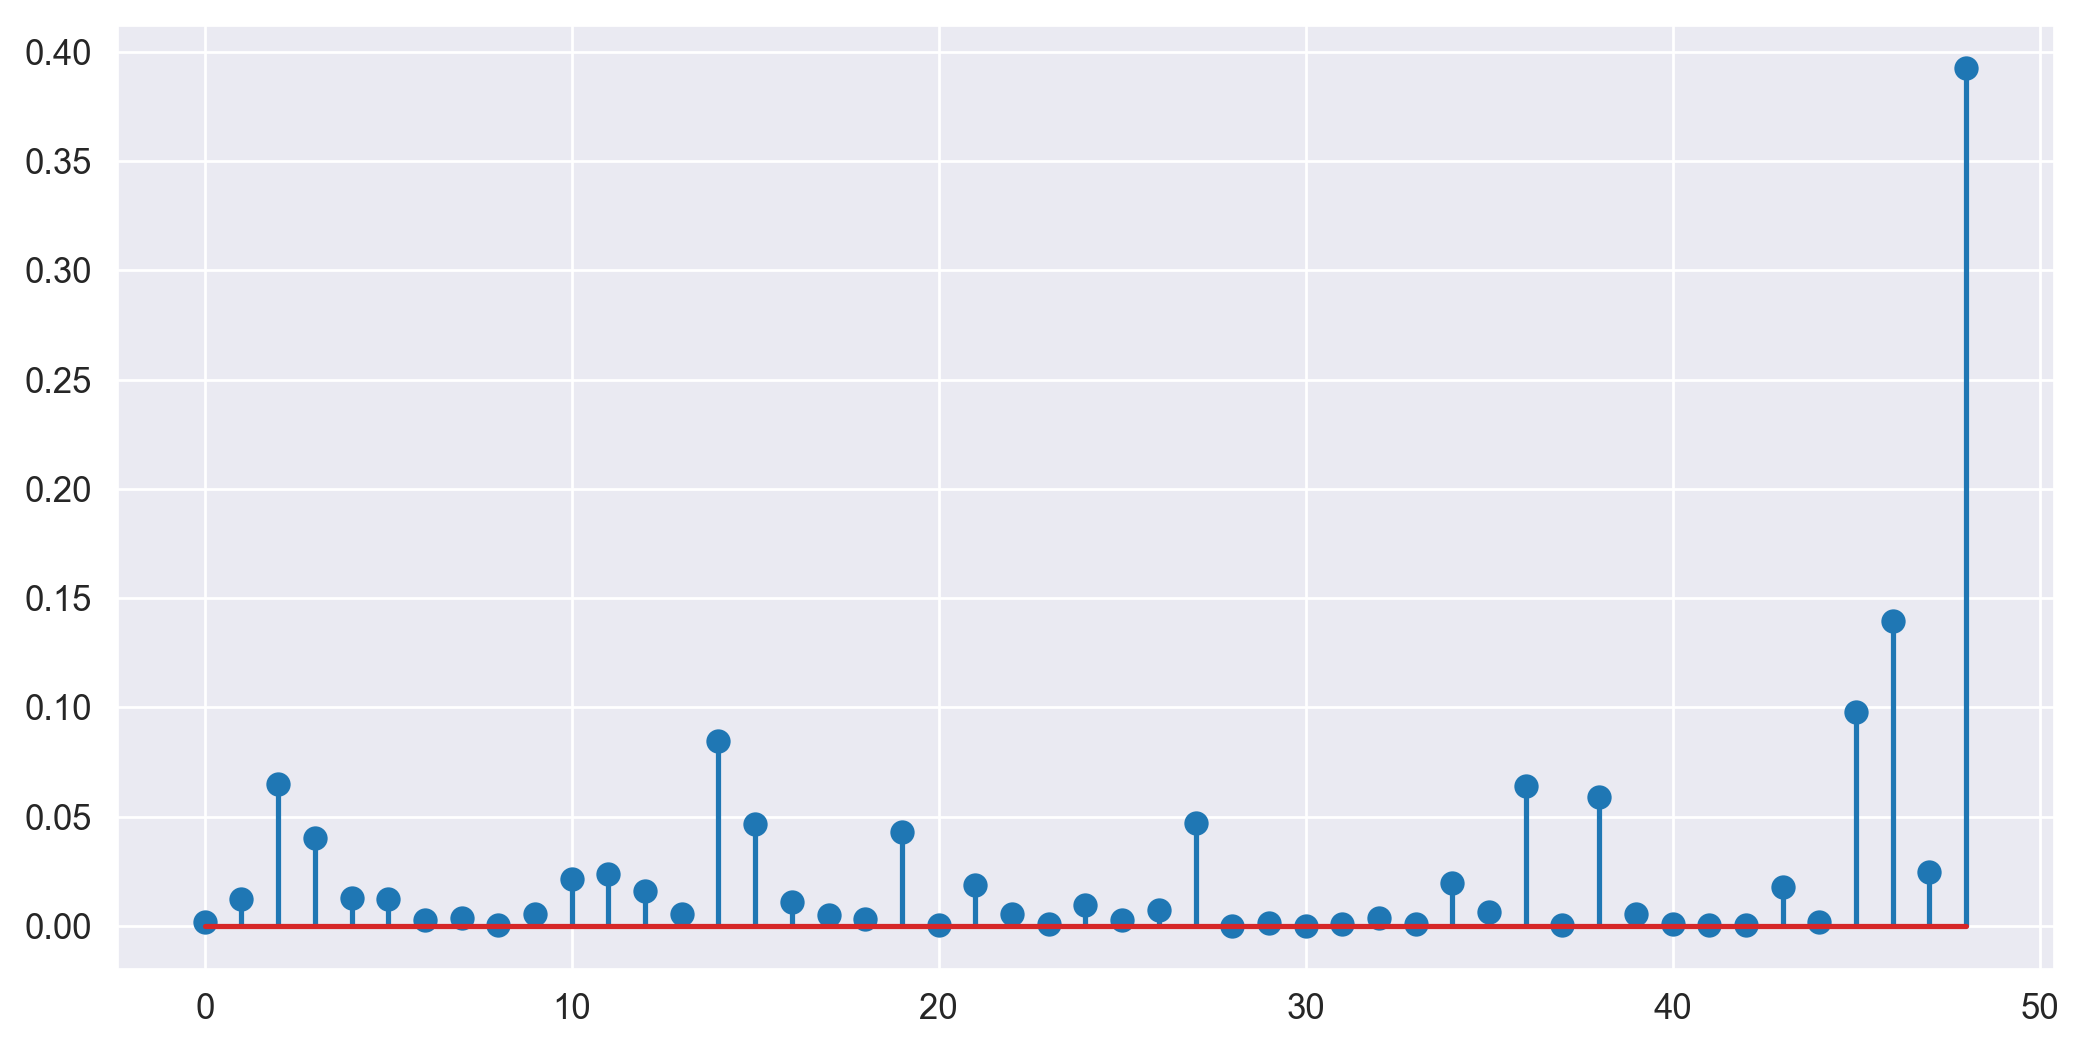

In [58]:
plt.stem(range(len(df)),c)

In [59]:
np.argmax(c),np.max(c)

(48, 0.3927442055632136)

In [60]:
df

df.drop(index=[48],inplace=True)


In [61]:
df

,index,RD,Adm,MSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [63]:
model1 = smf.ols('Profit~MSpend+Adm+RD', data=df).fit()

inf = model1.get_influence()
c,p = inf.cooks_distance

In [64]:
c

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

<StemContainer object of 3 artists>

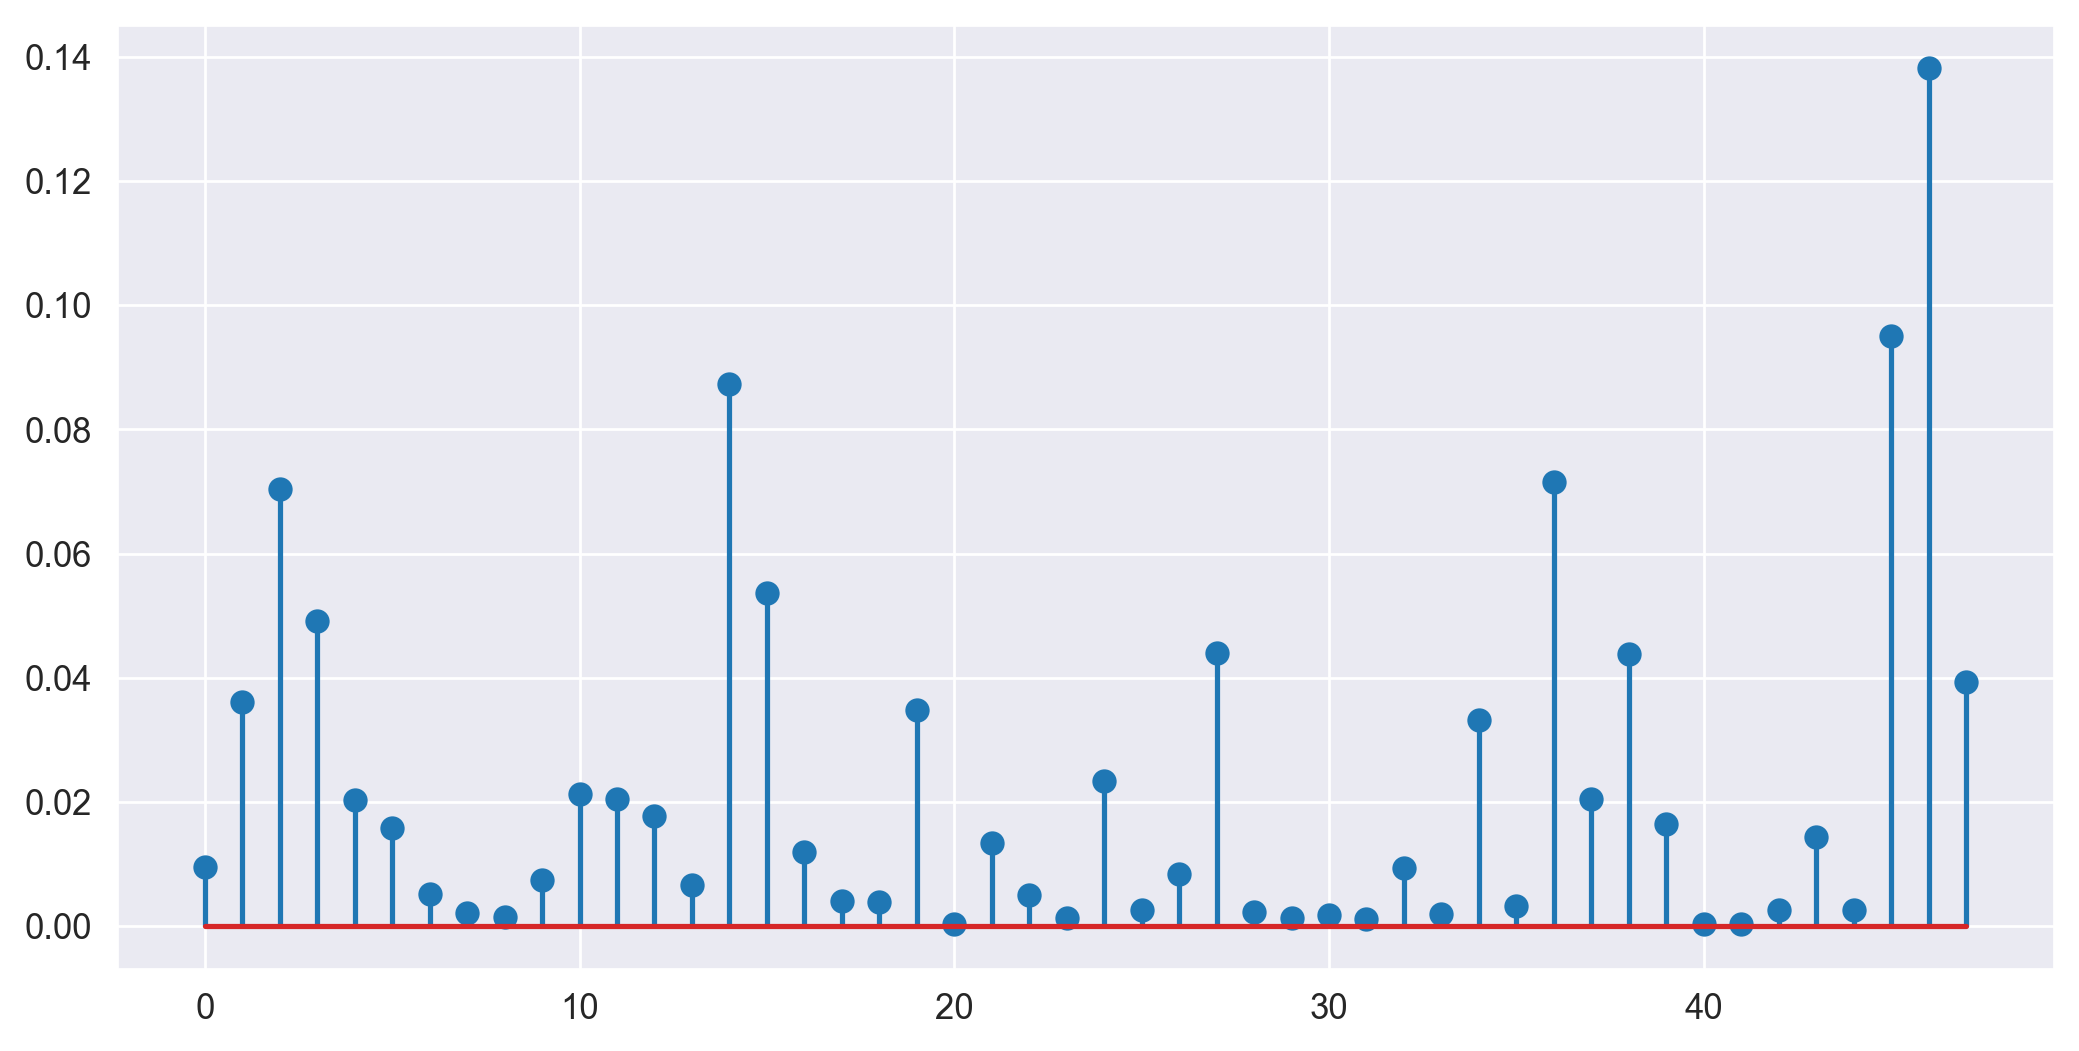

In [65]:
plt.stem(range(len(df)),c)

In [66]:
#model is ready 